# Kalorimetrie Küchentischversuch - Newtonsches Abkühlungsgesetz
Author: Noah Michel

Datum: 18.11.2023

Gruppe: 18

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu diesem Versuch.

Wie kann der koeffizient des newtonsches abkühlungsgesetz berechnet werden?

## Versuchsaufbau und Durchführung

Beschreiben Sie den Versuchsaufbau und die Versuchsdurchführung. Machen Sie ein Bild von Ihrem Aufbau und nutzen Sie dieses mit zur Beschreibung.


<img src="figures/newton.jpeg" width="800">

## Versuchsauswertung

In [1]:
import numpy as np
from matplotlib import pyplot as plt
# If you plan to write functions in another module,
# you can use importlib.reload(module) to reload the module
# at the beginning of each cell in order to make the latest
# changes take effect without restart the kernel.
import importlib
import json 
import h5py

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Newtonsches Abkühlungsgesetz

Hinweis: Nutzen Sie die Funktionen *get_ids_from_setup* und *get_json_entry* um auf Metadaten zuzugreifen. 

Sie sollten Ihr Programm zwischen TODO und DONE implementieren, und versuchen die Anweisung zu verfolgen. Das ist aber nicht erforderlich.


#### (i) Messdaten einlesen

Messdaten werden in das Notebook eingelesen.

In [2]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.
f = h5py.File("data/daten1/daten1.h5", "r")

# DONE #

In [3]:
# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.
# HINT: You can find information about how to access to H5 Files in the README of your Repo.
rawdata = f.get('RawData') # als erstes den ersten ordner lesen 

keys_uuid = rawdata.keys() #gucken was drin ist

list_uuid = []
for i in keys_uuid: #namen der subgruppen (uuids) in eine Liste speichern
    list_uuid.append(i)

uuid_sensor1 = f.get('RawData/' + str(list_uuid[0])) #die unterordner aufrufen
uuid_sensor2 = f.get('RawData/' + str(list_uuid[1]))

keys_uuid_sensor1 = uuid_sensor1.keys()
keys_uuid_sensor2 = uuid_sensor2.keys()

list_sensor1 = []
for i in keys_uuid_sensor1: #temperatur und time in eine liste speichern
    list_sensor1.append(i)

list_sensor2 = []
for i in keys_uuid_sensor2:
    list_sensor2.append(i)

temperaturdaten_sensor1 = f.get('RawData/' + str(list_uuid[0]) + '/' + str(list_sensor1[0])) #temperaturdaten erfassen
temperaturdaten_sensor2 = f.get('RawData/' + str(list_uuid[1]) + '/' + str(list_sensor2[0]))

time_sensor1 = f.get('RawData/' + str(list_uuid[0]) + '/' + str(list_sensor1[1])) #time daten erfassen
time_sensor2 = f.get('RawData/' + str(list_uuid[1]) + '/' + str(list_sensor2[1]))

#alle temperatur- und timedaten in listen speichern

list_temperaturdaten_sensor1 = []
for i in temperaturdaten_sensor1:
    list_temperaturdaten_sensor1.append(i)

list_temperaturdaten_sensor2 = []
for i in temperaturdaten_sensor2:
    list_temperaturdaten_sensor2.append(i)

list_time_sensor1 = []
for i in time_sensor1:
    list_time_sensor1.append(i)

list_time_sensor2 = []
for i in time_sensor2:
    list_time_sensor2.append(i)

print (list_temperaturdaten_sensor1)
print (list_time_sensor1)

f.close()
# DONE #

[24.5625, 24.625, 24.625, 24.5625, 24.5625, 24.625, 24.5625, 24.5625, 24.5625, 24.5625, 24.625, 24.625, 24.625, 24.625, 24.625, 24.625, 24.6875, 24.625, 24.6875, 24.625, 24.6875, 24.6875, 24.6875, 24.6875, 24.625, 24.6875, 24.625, 24.6875, 24.625, 24.6875, 24.6875, 24.6875, 24.6875, 24.6875, 24.6875, 24.75, 24.75, 24.75, 24.6875, 24.75, 24.75, 24.6875, 24.75, 24.75, 24.6875, 24.75, 24.75, 24.75, 24.75, 24.75, 24.8125, 24.75, 24.75, 24.75, 24.75, 24.8125, 24.875, 24.875, 24.8125, 24.8125, 24.8125, 24.8125, 24.8125, 24.8125, 24.8125, 24.8125, 24.8125, 24.75, 24.875, 24.8125, 24.875, 24.8125, 24.875, 24.8125, 24.9375, 24.9375, 24.9375, 24.9375, 24.9375, 24.9375, 24.9375, 24.875, 24.9375, 24.9375, 24.9375, 24.9375, 24.9375, 24.9375, 24.9375, 25.0, 24.9375, 24.9375, 24.9375, 24.9375, 24.9375, 24.9375, 24.9375, 24.9375, 24.9375, 24.9375, 24.9375, 24.9375, 24.9375, 24.9375, 24.9375, 25.0, 24.9375, 25.0, 24.9375, 25.0, 24.9375, 24.9375, 24.9375, 25.0, 25.0, 25.0, 25.0, 25.0, 24.9375, 24.9375, 

#### (ii) Daten Semi–log ploten

Die Zeit und Differenz zwischen der heißen Flüssigkeit und der Umgebungstemperatur wird aufgezeichnet.

Die y-Achse (Temperaturdifferenz) ist auf logarithmisch eingestellt und die x-Achse (Zeit) verwendet eine normale Skalierung.

findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.


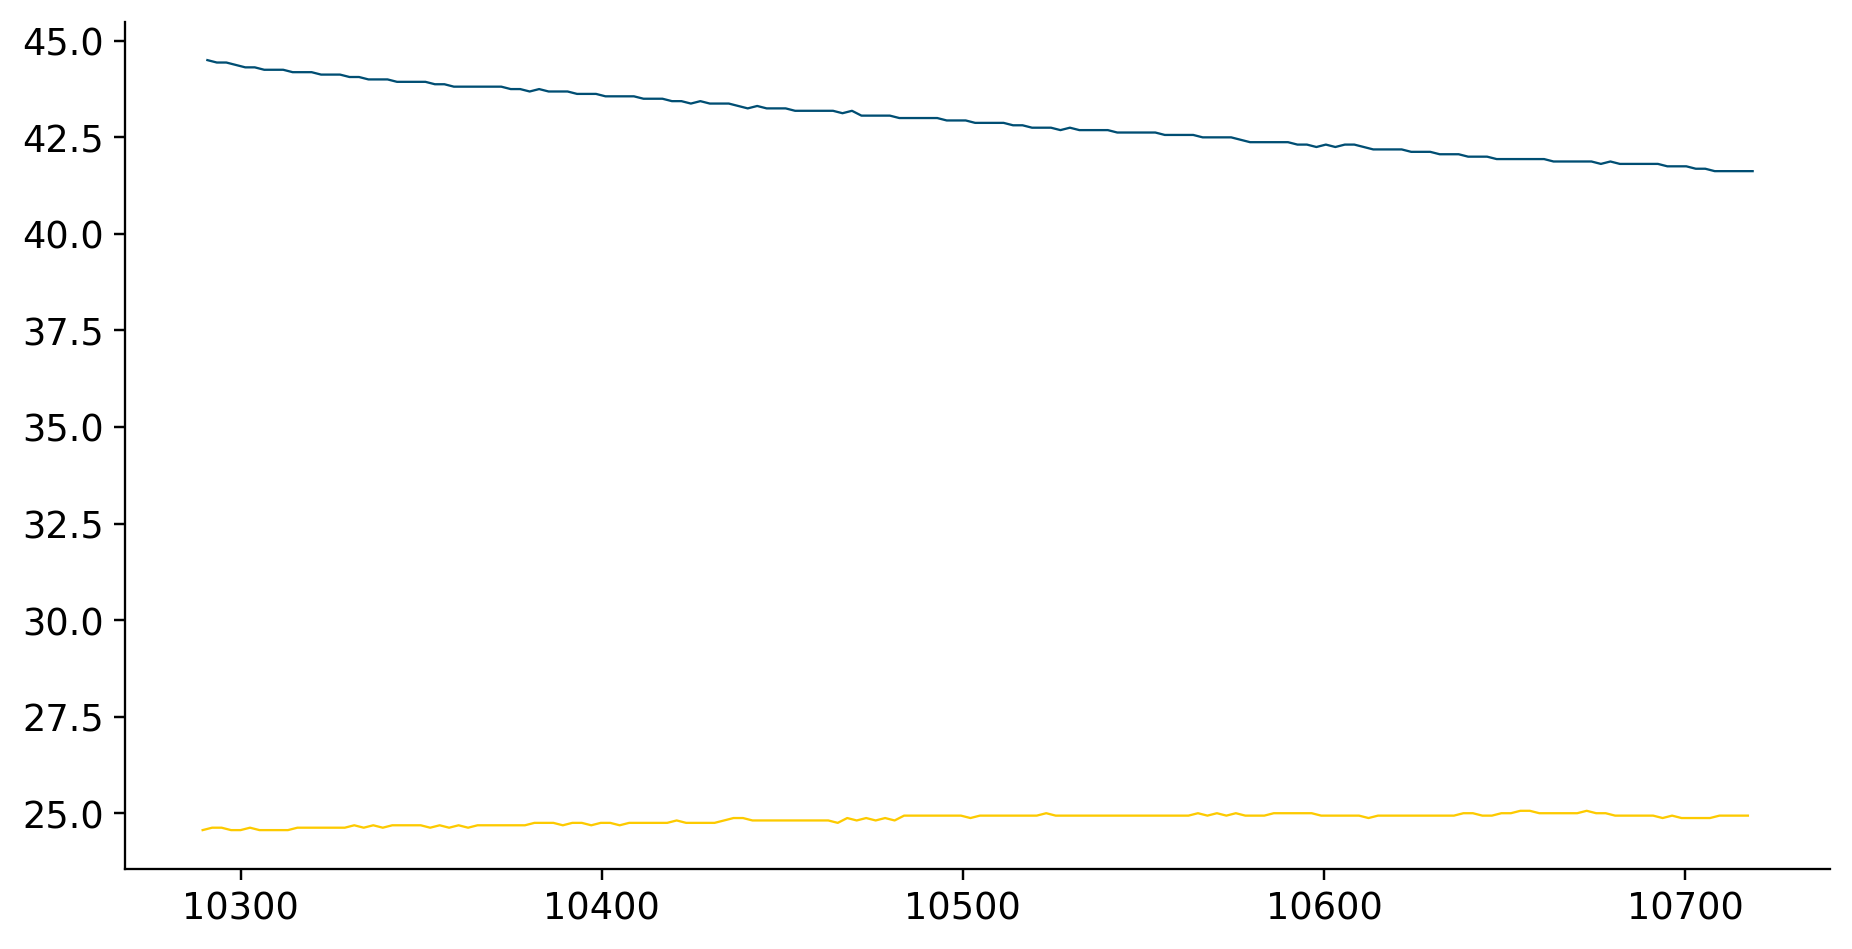

In [4]:
# TODO: Use the temperature and time data for plotting
x = np.array(list_temperaturdaten_sensor1)
y = np.array(list_time_sensor1)
x1 = np.array(list_temperaturdaten_sensor2)
y1 = np.array(list_time_sensor2)

plt.figure(figsize=(10,5))
plt.plot(y1,x1)
plt.plot(y,x)
plt.show()

#sensor1 war an der umgebungslunft und sensor2 im heißen getränk

# DONE #

#### (iii) Koeffizient in Newtonschem Abkühlungsgesetz
Die `numpy.polyfit` Funktion ist zu verwenden, um den Koeffizienten $K$ zu bestimmen.
$$
T(t) - T_2 = (T_1 - T_2)e^{Kt}
$$
Dabei ist $T(t) - T_2$ der Verlauf der Temperaturdifferenz. Die Anfangstemperatur ist $T_1$, die Endtemperatur ist $T_2$.

In [5]:
# TODO: Determine coefficient in Newtonschen Abkühlungsgesetz

K = np.polyfit(x1,y1,2)
print(koeffizient)

T1 = list_temperaturdaten_sensor2[0]
letzte_temperaturmessung = len(list_temperaturdaten_sensor2)
T2 = list_temperaturdaten_sensor2[letzte_temperaturmessung-1]

t = (list_time_sensor2[letzte_temperaturmessung-1] - list_time_sensor2[0])

import math

T = ((T1-T2)*math.exp(K*t) + T2)

# DONE #

NameError: name 'koeffizient' is not defined

#### (iV) Ergebnis

In [ ]:
# TODO: Print result

print(T)

# DONE #

## Diskussion

Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage.
Können Sie das Newtonsche Abkühlungsgesetz bestätigen?

Leider konnte ich nach langen versuchen nicht herausfinden wie ich mit der variable K weiter rechnen sollte.

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.

Kein Fazit da ich das Experiment nicht vollständig abschließen konnte